# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



   530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   

   11a  11b  12a  12b               storkreds  alder  
0   -2    1    1    1    Københavns Storkreds     78  
1    1   -2    0    0          Fyns Storkreds     64  
2    0   -1    1   -2     Bornholms Storkreds     37  
3    2   -1    2    0  Nordjyllands Storkreds     28  
4   -2    0    2   -2    Københavns Storkreds     58  

[5 rows x 53 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  --

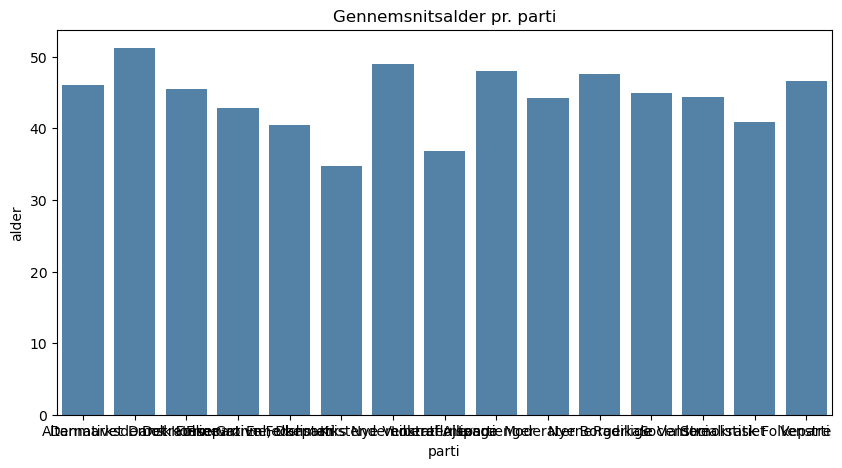

KeyError: "['KandidatID'] not in index"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import pdist, squareform

# ========================
# 1. INDLÆS DATA
# ========================
# Eksempelantagelse: du har 6 Excel-filer:
# - allData.xlsx
# - drdata.xlsx
# - drq.xlsx (spørgsmål fra DR)
# - tv2data.xlsx
# - tv2q.xlsx (spørgsmål fra TV2)
# - electeddata.xlsx (valgte kandidater)
#
# Juster stinavne og filnavne efter behov:

df_all = pd.read_excel("allData.xlsx")
df_dr = pd.read_excel("drdata.xlsx")
df_dr_q = pd.read_excel("drq.xlsx")
df_tv2 = pd.read_excel("tv2data.xlsx")
df_tv2_q = pd.read_excel("tv2q.xlsx")
df_elected = pd.read_excel("electeddata.xlsx")

# Hvis 'df_all' allerede indeholder alle oplysninger, kan vi arbejde direkte derfra:
df_full = df_all.copy()

# Tjek strukturen i dine data:
print(df_full.head())
print(df_full.info())

# ========================
# 2. FORENKLET SAMMENFØRING (HVIS BEHØV)
# ========================
# Hvis du har brug for at sammenkoble tabeller på fx KandidatID, gør sådan her:
# df_full = pd.merge(df_dr, df_tv2, on='KandidatID', how='outer')
# df_full = pd.merge(df_full, df_elected, on='KandidatID', how='left')
# osv.

# ========================
# 3. EKSPLORATIV ANALYSE
# ========================

# --- 3A. Aldersfordeling pr. parti ---
# Antag, at kolonnen for alder hedder "Alder" og kolonnen for parti hedder "Parti".
# Sådan får du forskellige statistikker per parti:

parti_alder_stats = df_full.groupby('parti')['alder'].agg(['count','mean','std','min','max'])
print("Aldersstatistik pr. parti:")
print(parti_alder_stats)

# Mulig bar-plot af gennemsnitlig alder pr. parti:
plt.figure(figsize=(10,5))
sns.barplot(
    x=parti_alder_stats.index, 
    y=parti_alder_stats['mean'].values, 
    color='steelblue'
)
plt.title("Gennemsnitsalder pr. parti")
plt.ylabel("alder")
plt.xlabel("parti")
plt.show()

# --- 3B. Mest “skråsikre” kandidater ---
# Skalaforståelse: "Enig" og "Uenig" er fx 1/-1, "Meget enig" og "Meget uenig" er 2/-2
# Vi beregner andelen af en kandidats svar, der er 2 eller -2.

# Antag, at spørgsmålskolonner hedder Spm1, Spm2, ..., SpmN
# Filtrer kolonnenavnene:
spm_kolonner = [col for col in df_full.columns if col.startswith("Spm")]

def fraktion_sterke_holdninger(row):
    svar = row[spm_kolonner].dropna()
    # Tæl hvor mange gange svaret er ±2
    stærk_count = np.sum(svar.isin([2, -2]))
    return stærk_count / len(svar) if len(svar) > 0 else 0

df_full['fraktion_sterke_svar'] = df_full.apply(fraktion_sterke_holdninger, axis=1)

# Sortér kandidater efter, hvor stor en andel af deres svar er ±2:
df_skrasikre = df_full[['KandidatID','parti','alder','fraktion_sterke_svar']].sort_values(
    'fraktion_sterke_svar', ascending=False
)
print("Top 10 mest 'skråsikre' kandidater (størst andel af ±2 svar):")
print(df_skrasikre.head(10))

# --- 3C. Inter- og intra-parti forskelle ---
# 1) Beregn partiers gennemsnitssvar på hvert spørgsmål:
parti_mean = df_full.groupby('parti')[spm_kolonner].mean()

# 2) Intra-parti uenigheder: 
#    fx gennemsnitlig standardafvigelse for hvert partis svar
parti_intra_std = df_full.groupby('parti')[spm_kolonner].std().mean(axis=1)
parti_intra_std = parti_intra_std.sort_values(ascending=False)
print("Gennemsnitlig standardafvigelse (intra-parti uenighed) pr. parti:")
print(parti_intra_std)

# 3) Inter-parti forskelle:
#    fx parvis euklidisk distance mellem partiernes gennemsnitssvar:
dist_matrix = pdist(parti_mean.values, metric='euclidean')
dist_matrix = squareform(dist_matrix)
df_dist = pd.DataFrame(dist_matrix, index=parti_mean.index, columns=parti_mean.index)
print("Parvis euklidisk distance mellem partiernes gennemsnitssvar:")
print(df_dist)

# ========================
# 4. KLASSIFIKATIONSMODELLER (Decision Tree, Random Forest, GBT)
# ========================
# Eksempel: forudsige "Parti" ud fra spørgeskemasvarene.
# Sørg for, at "Parti" er kategorisk. Her mapper vi partibogstav til tal.

df_model = df_full.dropna(subset=spm_kolonner + ['parti']).copy()

parti_map = {p: i for i, p in enumerate(df_model['parti'].unique())}
df_model['PartiLabel'] = df_model['Parti'].map(parti_map)

X = df_model[spm_kolonner]
y = df_model['PartiLabel']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4A. Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# --- 4B. Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# --- 4C. Gradient Boosted Trees ---
gbt = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)

print("Gradient Boosted Trees Classification Report:")
print(classification_report(y_test, y_pred_gbt))

# ========================
# 5. IDENTIFICÉR “FORKERTE” KLASSIFIKATIONER
# ========================
# Hvor skød modellerne ved siden af? Her for Decision Tree:

X_test['PartiFaktisk'] = y_test.map({v: k for k, v in parti_map.items()})
X_test['PartiPred_DT'] = y_pred_dt
X_test['PartiPred_DT'] = X_test['PartiPred_DT'].map({v: k for k, v in parti_map.items()})

df_misclass_dt = X_test[X_test['PartiFaktisk'] != X_test['PartiPred_DT']]
print("Kandidater fejlagtigt klassificeret (Decision Tree):")
print(df_misclass_dt)

# Tilsvarende for RF og GBT:

X_test['PartiPred_RF'] = y_pred_rf
X_test['PartiPred_RF'] = X_test['PartiPred_RF'].map({v: k for k, v in parti_map.items()})

X_test['PartiPred_GBT'] = y_pred_gbt
X_test['PartiPred_GBT'] = X_test['PartiPred_GBT'].map({v: k for k, v in parti_map.items()})

# ========================
# 6. KANDI
